# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 100  </p>
## <p style="text-align: center;">Due: October 15th(10/15/2020) submitted via Canvas by 11:59 pm</p>

## <p style="text-align: center;">Kewei Xu (kx625) and Yifu Huang (yh9692)</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)*

For the descriptive questions, you can write down the solution in paper and embed a picture of it to the notebook or type it out.

# Package version
matplotlib 3.1.2

sklearn 0.0

# Question 1 - Stochastic Gradient Descent (25 pts)
 1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: 
$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ 


 2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        self.coef # = please fill this to update self.coef using SGD
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please fill this
                # Compute gradients
                    #please fill this
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    #def linearPredict(self, X):  
        #compute dot product of self.coef and X
        
        

In [2]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer 

### 1.

### Define loss function (without regularization)
$L = (\hat{y}-y)^2+\frac{\lambda}{2}$  

### Compute gradients
$\frac{\partial L}{\partial \omega_{0}}=\frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \omega_0} = 2(\hat{y}-y)$  
$\frac{\partial L}{\partial \omega_{1}}=\frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \omega_1} = 2(\hat{y}-y)x_1$  
$\frac{\partial L}{\partial \omega_{2}}=\frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \omega_2} = 2(\hat{y}-y)x_1 x_2$  
$\frac{\partial L}{\partial \omega_{3}}=\frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \omega_3} = 2(\hat{y}-y)e^{-x_1}$  

### Coefficient update
$\omega_0^{\tau +1} = \omega_0^{\tau} - \eta \frac{\partial L}{\partial \omega_{0}} = \omega_0^{\tau} - \eta (2(\hat{y}-y))$  
$\omega_1^{\tau +1} = \omega_1^{\tau} - \eta \frac{\partial L}{\partial \omega_{1}} = \omega_1^{\tau} - \eta (2(\hat{y}-y)x_1)$  
$\omega_2^{\tau +1} = \omega_2^{\tau} - \eta \frac{\partial L}{\partial \omega_{2}} = \omega_2^{\tau} - \eta (2(\hat{y}-y)x_1 x_2)$  
$\omega_3^{\tau +1} = \omega_3^{\tau} - \eta \frac{\partial L}{\partial \omega_{3}} = \omega_3^{\tau} - \eta (2(\hat{y}-y)e^{-x_1})$  

### 2.

In [3]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient# = please fill this to update self.coef using SGD
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.coef = np.array([1,1,1,1])
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                    #please fill this
                y_pred = np.dot(X[i,:],self.coef)
                L = (y_pred-y[i])**2+self.regularization/2*np.sum(self.coef**2)
                # Compute gradients
                    #please fill this
                grad_w0 = 2*(y_pred-y[i])*X[i,0]+self.regularization*np.abs(self.coef[0])
                grad_w1 = 2*(y_pred-y[i])*X[i,1]+self.regularization*np.abs(self.coef[1])
                grad_w2 = 2*(y_pred-y[i])*X[i,2]+self.regularization*np.abs(self.coef[2])
                grad_w3 = 2*(y_pred-y[i])*X[i,3]+self.regularization*np.abs(self.coef[3])
                gradient = np.array([grad_w0,grad_w1,grad_w2,grad_w3])
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            #print(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
            #print("one epoch is done...")
        self.lowest_mse = mse[-1]
        print("MSE after 15 epoches: ", self.lowest_mse)
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        #compute dot product of self.coef and X
        y_pred = np.dot(X,self.coef)
        return y_pred
        
        

### Using SGD


In [4]:
for lr in learning_rate:
    for reg in regularization:
        print("This is the result under learning rate = ", lr, "; regularization = ",reg)
        SGDregressor = Regression(learning_rate=lr, regularization=reg, n_epoch=15)
        SGDregressor.fit(X,y,plot=False)
        

This is the result under learning rate =  0.0001 ; regularization =  0
MSE after 15 epoches:  0.07308925470821862
This is the result under learning rate =  0.0001 ; regularization =  10
MSE after 15 epoches:  0.050774300936547376
This is the result under learning rate =  0.0001 ; regularization =  100
MSE after 15 epoches:  0.06260199881065674
This is the result under learning rate =  0.001 ; regularization =  0
MSE after 15 epoches:  0.02924754527031853
This is the result under learning rate =  0.001 ; regularization =  10
MSE after 15 epoches:  0.05067168574252283
This is the result under learning rate =  0.001 ; regularization =  100
MSE after 15 epoches:  0.062313437988066225
This is the result under learning rate =  0.01 ; regularization =  0
MSE after 15 epoches:  0.027405111908430577
This is the result under learning rate =  0.01 ; regularization =  10


D:\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
D:\anaconda\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


MSE after 15 epoches:  inf
This is the result under learning rate =  0.01 ; regularization =  100
MSE after 15 epoches:  nan
This is the result under learning rate =  0.1 ; regularization =  0
MSE after 15 epoches:  0.034754481799940576
This is the result under learning rate =  0.1 ; regularization =  10
MSE after 15 epoches:  nan
This is the result under learning rate =  0.1 ; regularization =  100
MSE after 15 epoches:  nan
This is the result under learning rate =  1 ; regularization =  0


D:\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


MSE after 15 epoches:  nan
This is the result under learning rate =  1 ; regularization =  10
MSE after 15 epoches:  nan
This is the result under learning rate =  1 ; regularization =  100
MSE after 15 epoches:  nan
This is the result under learning rate =  10 ; regularization =  0


D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


MSE after 15 epoches:  nan
This is the result under learning rate =  10 ; regularization =  10
MSE after 15 epoches:  nan
This is the result under learning rate =  10 ; regularization =  100
MSE after 15 epoches:  nan
This is the result under learning rate =  100 ; regularization =  0
MSE after 15 epoches:  nan
This is the result under learning rate =  100 ; regularization =  10
MSE after 15 epoches:  nan
This is the result under learning rate =  100 ; regularization =  100
MSE after 15 epoches:  nan


This is the result under learning rate = 0.01 ; regularization = 0
MSE after 15 epoches:  0.027405111908430577


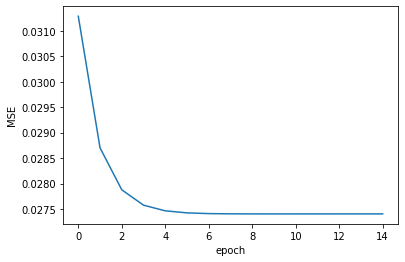

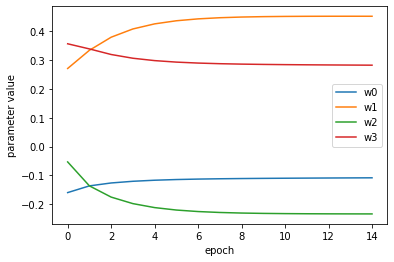

In [5]:
# Best model
print("This is the result under learning rate = 0.01", "; regularization = 0")
SGDregressor_1 = Regression(learning_rate=0.01, regularization=0, n_epoch=15)
SGDregressor_1.fit(X,y,plot=True)

This is the result under learning rate = 0.001 ; regularization = 0
MSE after 15 epoches:  0.02924754527031853


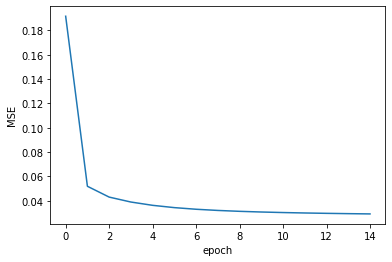

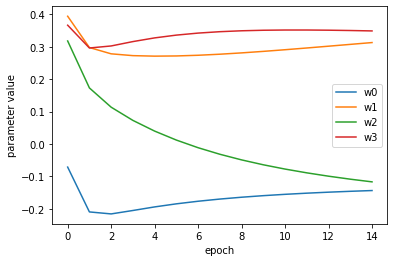

In [6]:
# Second best model
print("This is the result under learning rate = 0.001", "; regularization = 0")
SGDregressor_2 = Regression(learning_rate=0.001, regularization=0, n_epoch=15)
SGDregressor_2.fit(X,y,plot=True)

# Question 2 - MLP Regressor(15 pts) 

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)



We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.



   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

In [8]:
# 1）
from sklearn.neural_network import MLPRegressor
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

regr1 = MLPRegressor(hidden_layer_sizes = (5,), activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20, learning_rate_init = 0.005).fit(X_train, y_train)
regr2 = MLPRegressor(hidden_layer_sizes = (15,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20, learning_rate_init = 0.005).fit(X_train, y_train)
regr3 = MLPRegressor(hidden_layer_sizes = (20,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20, learning_rate_init = 0.005).fit(X_train, y_train)

y_train_pred_1 = regr1.predict(X_train)
y_train_pred_2 = regr2.predict(X_train)
y_train_pred_3 = regr3.predict(X_train)

y_test_pred_1 = regr1.predict(X_test)
y_test_pred_2 = regr2.predict(X_test)
y_test_pred_3 = regr3.predict(X_test)

RMSE_1_train = mean_squared_error(y_train_pred_1, y_train, squared=False)
RMSE_1_test = mean_squared_error(y_test_pred_1, y_test, squared=False)
RMSE_2_train = mean_squared_error(y_train_pred_2, y_train, squared=False)
RMSE_2_test = mean_squared_error(y_test_pred_2, y_test, squared=False)
RMSE_3_train = mean_squared_error(y_train_pred_3, y_train, squared=False)
RMSE_3_test = mean_squared_error(y_test_pred_3, y_test, squared=False)

print("Hidden_layer_sizes = (5,) : training set RMSE = ", RMSE_1_train, ';testing set RMSE = ',RMSE_1_test)
print("Hidden_layer_sizes = (15,): training set RMSE = ", RMSE_2_train, ';testing set RMSE = ',RMSE_2_test)
print("Hidden_layer_sizes = (50,): training set RMSE = ", RMSE_3_train, ';testing set RMSE = ',RMSE_3_test)


Hidden_layer_sizes = (5,) : training set RMSE =  3.3601289540161896 ;testing set RMSE =  4.7984130428905605
Hidden_layer_sizes = (15,): training set RMSE =  3.019913013712589 ;testing set RMSE =  4.5517066936252295
Hidden_layer_sizes = (50,): training set RMSE =  2.986146396225336 ;testing set RMSE =  4.741426447005904


The model with 15 hidden units performs the best. As we increase the number of hidden units in our model, the training set error continues to reduce, but the testing set error reduces first and bounds back. This indicates the model with 50 hidden units overfits on training set. To conclude, more hidden units not necessarily means a better model performance.

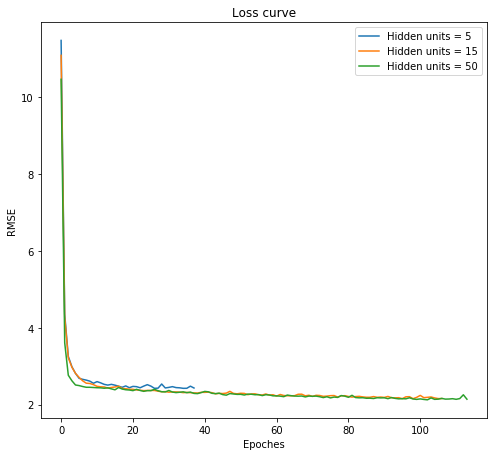

In [9]:
# 2)
plt.figure(1, figsize = (8, 16))
ax_1 = plt.subplot(2, 1, 1)
ax_1.set_title('Loss curve')
plt.plot(np.sqrt(regr1.loss_curve_), label='Hidden units = 5')
plt.plot(np.sqrt(regr2.loss_curve_), label='Hidden units = 15')
plt.plot(np.sqrt(regr3.loss_curve_), label='Hidden units = 50')
plt.xlabel('Epoches')
plt.ylabel('RMSE')
plt.legend(loc='upper right')
plt.show()

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:352: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


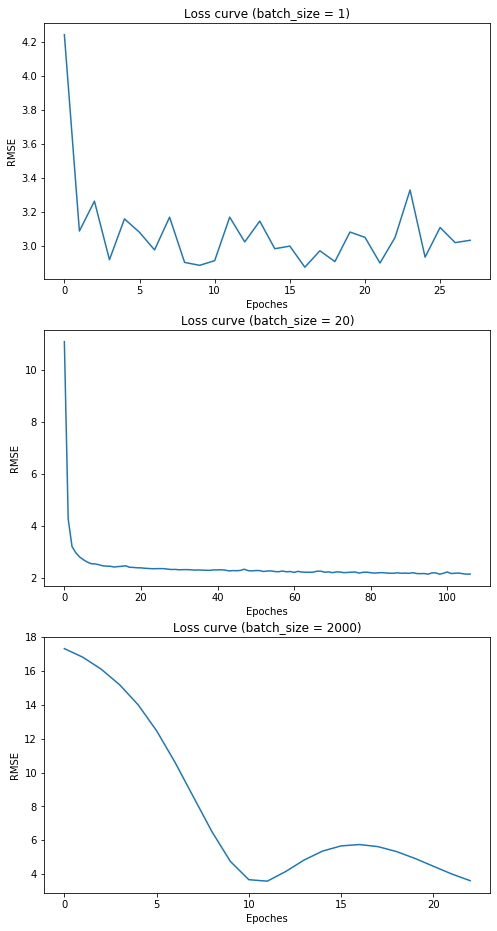

In [10]:
# 3)
regr4 = MLPRegressor(batch_size = 1, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)).fit(X_train, y_train)
regr5 = MLPRegressor(batch_size = 20, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)).fit(X_train, y_train)
regr6 = MLPRegressor(batch_size = 2000, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)).fit(X_train, y_train)

plt.figure(1, figsize = (8, 16))
ax_1 = plt.subplot(3, 1, 1)
ax_1.set_title('Loss curve (batch_size = 1)')
plt.plot(np.sqrt(regr4.loss_curve_), label='batch_size = 1')
plt.xlabel('Epoches')
plt.ylabel('RMSE')

ax_2 = plt.subplot(3, 1, 2)
ax_2.set_title('Loss curve (batch_size = 20)')
plt.plot(np.sqrt(regr5.loss_curve_), label='batch_size = 20')
plt.xlabel('Epoches')
plt.ylabel('RMSE')

ax_1 = plt.subplot(3, 1, 3)
ax_1.set_title('Loss curve (batch_size = 2000)')
plt.plot(np.sqrt(regr6.loss_curve_), label='batch_size = 2000')
plt.xlabel('Epoches')
plt.ylabel('RMSE')
plt.show()

The gradient obtained under batch_size = 1 is very noisy. Because one datapoint in our training set may contain some noise, it may result in the gradient obtained using this datapoint actually increases the error instead of decrease. When we use a proper large batch size, e.g. batch_size = 20, the impact of noise is reduced because the noise is usually normally distributed with mean equals to zero. Taking the average over all datapoints in one batch will somewhat cancel out the noise in the data. However, when the batch size is too large, even larger than the sample size in our example above (2000>294), the algorithm is actually gradient decent instead of SGD. One advantage of a large batch size is that it takes less epoches to reach a small error than a small batch size since the negative gradient is pointing directly to the global minimum. However a too large batch size may cause the gradient go pass the global minimum point and hang around it. To conclude, here batch_size=20 is the best choice among all three choices and in practice, a too large or too small batch size is not desired because it may influence the model efficiency.

# Question 3: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (4 pts)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (4 pts)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (4 pts)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (3 pts)

1)   
    Tanh  activation function after 1000 epoch: Train losses: 0.117; Test losses: 0.178.  
    Linear  activation function after 1000 epoch: Train losses: 0.492; Test losses: 0.511.  
    The decision boundary obtained by Tanh activation function is either -1 or 1 with a clear division line. The transition from -1 to 1 is very quick. On the contrary, the decision boundary obtained by linear activation function is blur and the result is almost as bad as random guess. The contour changes from -0.2 to 0.2 linearly and never reaches -1 or 1.
    
2)  
4 neurons after 1000 epoch: Train losses: 0.011; Test losses: 0.029.  
8 neurons after 1000 epoch: Train losses: 0.006; Test losses: 0.027.  
The decision boundary obtained under 4 and 8 neurons are similar, which is consistant to their similar test and train losses. Compare to 2 neurons, 4 neurons is able to identify four groups more efficiently. Each one of the 4 neurons represents one group and together they have a relative accurate prediction. Increasing 4 to 8 neurons doesn't improve the accuracy significantly because the 4 more neurons are just the repeat of the first 4 neurons, which will be redundant to our model.  

3)  
Epochs = 100, Learning rate = 10:  Test losses: 0.992; Train losses: 0.960.  
Epochs = 100, Learning rate = 0.1:  Test losses: 0.007; Train losses: 0.004.  
Epochs = 100, Learning rate = 0.01:  Test losses: 0.060; Train losses: 0.045.  
Epochs = 100, Learning rate = 0.001:  Test losses: 0.427; Train losses: 0.433.  

Epochs = 1000, Learning rate = 10:  Test losses: 0.942; Train losses: 0.888.  
Epochs = 1000, Learning rate = 0.1:  Test losses: 0.004; Train losses: 0.000.  
Epochs = 1000, Learning rate = 0.01:  Test losses: 0.016; Train losses: 0.011.  
Epochs = 1000, Learning rate = 0.001:  Test losses: 0.169; Train losses: 0.152.  

When the learning rate is too small (0.01 and 0.001), the model takes longer to converge to optimal solution, so the number of epoch increases will reduce the loss. When the learning rate is too large (10), the model will diverge very quickly. When the learning rate is somewhat proper (0.1), the loss curve goes down very quickly in the first couple epoches and starts to stablize. That is also why the improvment of loss is not obvious under learning rate = 0.1 when epochs increase.  

4)   
There are multiple ways of obtaining the best train/test loss in this model. We can conclude that the datapoints in the first and third quadrants is one group, and the datapoints in the second and fourth quadrants is another group. Therefore one universal rule that can help us classify the point is $x_1 x_2 > 0$ or not. The datapoints in first and third quadrants have $x_1 x_2 > 0$ and the datapoints in second and fourth quadrants have $x_1 x_2 < 0$. based on the analyse above, the best and simplest model is to choose $x_1 x_2$ as input and no hidden layer needed. In this model we can obtain test loss = 0.002 and train loss = 0.001 after 1000 epoches. Below is the screenshot of our model. 
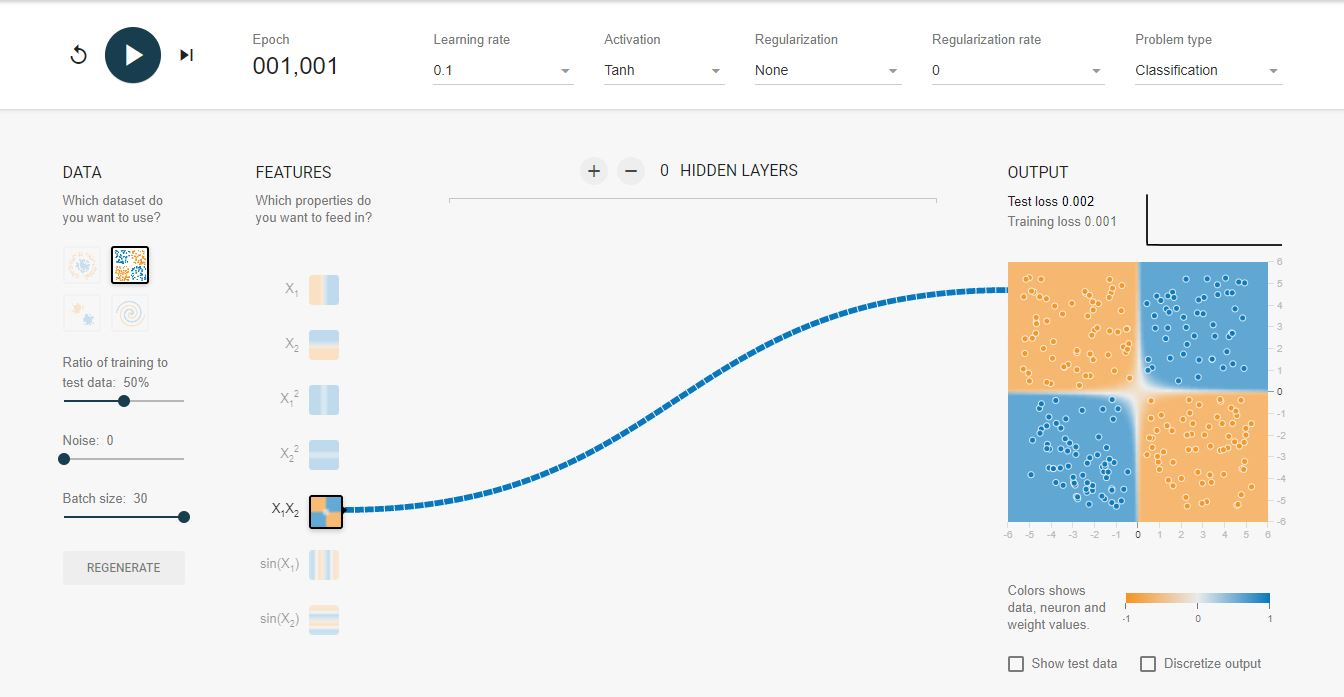

# Question 4 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

Create a train_test split of 80:20(train:test) with random state = 50 We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data and all the orignal features.Use the default values for MLPRegressor as below(**8pts**)

    MLPRegressor(max_iter = 1000,random_state=1)


5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

# Here we demonstrated both old and new solutions

# 1. Old

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

In [2]:
class_df = pd.read_csv("class.csv")

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
class_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


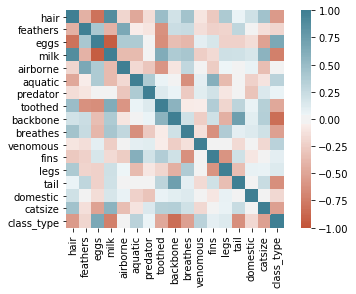

In [5]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)

In [6]:
corr_s = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
corr_s = corr_s[['class_type',]]
corr_s_p = corr_s[corr_s > 0].stack().reset_index()
corr_s_p.sort_values(by = [0], ascending = False).head(5)

,level_0,level_1,0
0,eggs,class_type,0.661825
2,aquatic,class_type,0.326639
4,venomous,class_type,0.321476
6,legs,class_type,0.131693
5,fins,class_type,0.099430


In [7]:
corr_s_n = corr_s[corr_s < 0].stack().reset_index()
corr_s_n.sort_values(by = [0], ascending = True).head(5)

,level_0,level_1,0
4,backbone,class_type,-0.828845
2,milk,class_type,-0.723683
6,tail,class_type,-0.631830
0,hair,class_type,-0.562384
8,catsize,class_type,-0.521030


In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 50)
estimator = LogisticRegression(max_iter = 1000)
selector = RFE(estimator, n_features_to_select = 5, step = 1)
selector = selector.fit(X, y)
# selector.support_

print ("Features sorted by their rank:")
print (sorted(zip(map(float, selector.ranking_), X.columns)))

Features sorted by their rank:
[(1.0, 'backbone'), (1.0, 'breathes'), (1.0, 'feathers'), (1.0, 'milk'), (1.0, 'toothed'), (2.0, 'hair'), (3.0, 'fins'), (4.0, 'tail'), (5.0, 'airborne'), (6.0, 'eggs'), (7.0, 'aquatic'), (8.0, 'legs'), (9.0, 'catsize'), (10.0, 'predator'), (11.0, 'venomous'), (12.0, 'domestic')]


**The features selected by RFE: backbone, breathes, feathers, milk, toothed**

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
# X.head()
X_train_a = X_train[:, [2, 5, 10, 11, 12]]
X_train_b = X_train[:, [0, 3, 8, 13, 15]]
X_train_c = X_train[:, [1, 3, 7, 8, 9]]
X_test_a = X_test[:, [2, 5, 10, 11, 12]]
X_test_b = X_test[:, [0, 3, 8, 13, 15]]
X_test_c = X_test[:, [1, 3, 7, 8, 9]]

MLP = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_a = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_b = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_c = MLPRegressor(max_iter = 1000, random_state = 1)

In [10]:
MLP_a.fit(X_train_a, y_train)
r2_a = r2_score(MLP_a.predict(X_test_a), y_test)

MLP_b.fit(X_train_b, y_train)
r2_b = r2_score(MLP_b.predict(X_test_b), y_test)

MLP_c.fit(X_train_c, y_train)
r2_c = r2_score(MLP_c.predict(X_test_c), y_test)

MLP.fit(X_train, y_train)
r2 = r2_score(MLP.predict(X_test), y_test)

In [11]:
print("Top 5 most positvely correlated features R^2:", r2_a)
print("Top 5 most negatively correlated features R^2:", r2_b)
print("Top 5 features selected by RFE R^2:", r2_c)
print("All features R^2:", r2)

Top 5 most positvely correlated features R^2: 0.7734484881648312
Top 5 most negatively correlated features R^2: 0.8226475155952138
Top 5 features selected by RFE R^2: 0.9719358312122883
All features R^2: 0.9682757092074497


# New

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

In [2]:
class_df = pd.read_csv("class.csv")

In [3]:
i = 0
while i < df.shape[0]:
    if df.iat[i, 17] < 6:
        df.iat[i, 17] = 1
    else:
        df.iat[i, 17] = 0
    i = i + 1

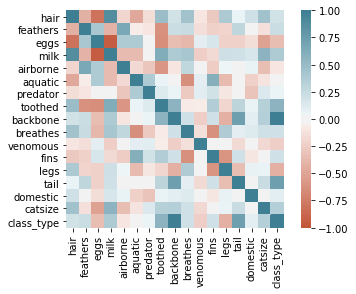

In [4]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)

In [5]:
corr_s = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
corr_s = corr_s[['class_type',]]
corr_s_p = corr_s[corr_s > 0].stack().reset_index()
corr_s_p.sort_values(by = [0], ascending = False).head(5)

,level_0,level_1,0
6,backbone,class_type,1.000000
9,tail,class_type,0.731762
5,toothed,class_type,0.575085
2,milk,class_type,0.384958
11,catsize,class_type,0.356976


In [7]:
corr_s_n = corr_s[corr_s < 0].stack().reset_index()
corr_s_n.sort_values(by = [0], ascending = True).head(5)

,level_0,level_1,0
3,legs,class_type,-0.432856
0,eggs,class_type,-0.340420
2,venomous,class_type,-0.246611
1,airborne,class_type,-0.104718


In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 50)
estimator = LogisticRegression(max_iter = 1000)
selector = RFE(estimator, n_features_to_select = 5, step = 1)
selector = selector.fit(X, y)
# selector.support_

print ("Features sorted by their rank:")
print (sorted(zip(map(float, selector.ranking_), X.columns)))

Features sorted by their rank:
[(1.0, 'backbone'), (1.0, 'feathers'), (1.0, 'milk'), (1.0, 'tail'), (1.0, 'toothed'), (2.0, 'catsize'), (3.0, 'breathes'), (4.0, 'eggs'), (5.0, 'legs'), (6.0, 'aquatic'), (7.0, 'venomous'), (8.0, 'hair'), (9.0, 'fins'), (10.0, 'domestic'), (11.0, 'airborne'), (12.0, 'predator')]


**The top 5 features by RFE: backbone, feathers, milk, tail, toothed**

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
# X.head()
X_train_a = X_train[:, [3, 7, 8, 13, 15]]
X_train_b = X_train[:, [2, 4, 10, 11]]
X_train_c = X_train[:, [1, 3, 7, 8, 13]]
X_test_a = X_test[:, [3, 7, 8, 13, 15]]
X_test_b = X_test[:, [2, 4, 10, 11]]
X_test_c = X_test[:, [1, 3, 7, 8, 13]]

MLP = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_a = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_b = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_c = MLPRegressor(max_iter = 1000, random_state = 1)

In [11]:
MLP_a.fit(X_train_a, y_train)
r2_a = r2_score(MLP_a.predict(X_test_a), y_test)

MLP_b.fit(X_train_b, y_train)
r2_b = r2_score(MLP_b.predict(X_test_b), y_test)

MLP_c.fit(X_train_c, y_train)
r2_c = r2_score(MLP_c.predict(X_test_c), y_test)

MLP.fit(X_train, y_train)
r2 = r2_score(MLP.predict(X_test), y_test)

In [12]:
print("Top 5 most positvely correlated features R^2:", r2_a)
print("Top 5 most negatively correlated features R^2:", r2_b)
print("Top 5 features selected by RFE R^2:", r2_c)
print("All features R^2:", r2)

Top 5 most positvely correlated features R^2: 0.98487409396085
Top 5 most negatively correlated features R^2: -1.9775367552768972
Top 5 features selected by RFE R^2: 0.9986347135585708
All features R^2: 0.9510122697725267


# 5)

**Answer**

The 5 features selected by RFE gave better results. RFE feature selection used logistic regression to estimate the correlation of the features. By increasing the iteration times, the most important features will weigh more in the model. In this case, "backbone" gives a 100% correlation with class type. The regression model trained by the top 5 features will approach the R^2 of 1. When the iteration times is high enough, RFE will give a R^2 which is very close to 1. Also, it can be noticed that teh R^2 given by all features is smaller than that of top 5 features. It is because other features introduced extra variance and bias.

# Question 5 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [12]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


### Question 5.1 (5 points)
Print the number of NaN values in each column. Next, if the value of yr_renovated is equal to 0, set it equal to the corresponding value of yr_built.



In [13]:
print(df.isna().sum())

bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64


In [14]:
i = 0
while i < df.shape[0]:
    if df.iat[i, 12] == 0:
        df.iat[i, 12] = df.iat[i, 11]
    i = i + 1
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0


### Question 5.2 (6 points)

Create a copy of df named df_dm and create a new column in df_dm named binned_yr_built and apply binning to the column yr_built. Use pandas.cut() and modify its paramter list as below:

bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True

Next, perform one-hot encoding using this new column.

In [15]:
df_dm = df

In [16]:
df_dm['binned_yr_built'] = pd.cut(df_dm['yr_built'], bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020], labels = ['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'], include_lowest=True)
df_dm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price,binned_yr_built
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0,1940-1960
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0,1940-1960
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0,1920-1940
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0,1960-1980
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0,1980-2000


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_dm['binned_yr_built'] = labelencoder.fit_transform(df_dm['binned_yr_built'])
one_hot_encoder = OneHotEncoder()
enc_df = pd.DataFrame(one_hot_encoder.fit_transform(df_dm[['binned_yr_built']]).toarray())
df_dm = df_dm.join(enc_df)
df_dm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,price,binned_yr_built,0,1,2,3,4,5
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,...,1955,98178.0,221900.0,2,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,...,1991,98125.0,538000.0,2,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,...,1933,NaN,180000.0,1,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,...,1965,NaN,604000.0,3,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,...,1987,98074.0,510000.0,4,0.0,0.0,0.0,0.0,1.0,0.0


### Question 5.3 (4 points)

Create a copy of df named temp_df. Drop all rows in temp_df that contain any null value and run a linear regression model using a train-test split with test_size=0.3 and random_state=42.


In [18]:
temp_df = df.drop(['binned_yr_built'], axis = 1)
temp_df = temp_df.dropna(how = 'any', axis = 0)
temp_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0
6,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995,1995,98003.0,257500.0
9,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003,2003,98038.0,323000.0
10,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,3.0,8.0,1860.0,1700.0,1965,1965,98007.0,662500.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = temp_df.drop(['price'], axis = 1)
y = temp_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_53 = LinearRegression()
reg_53.fit(X_train, y_train)
r2_test = r2_score(reg_53.predict(X_test), y_test)
r2_train = r2_score(reg_53.predict(X_train), y_train)
MSE_test = mean_squared_error(reg_53.predict(X_test), y_test)
MSE_train = mean_squared_error(reg_53.predict(X_train), y_train)
print("Drop all NaN test set R^2:", r2_test)
print("Drop all NaN train set R^2:", r2_train)
print("Drop all NaN test set MSE:", MSE_test)
print("Drop all NaN train set MSE:", MSE_train)

Drop all NaN test set R^2: 0.6155067304441311
Drop all NaN train set R^2: 0.5136543989256577
Drop all NaN test set MSE: 35064403219.256905
Drop all NaN train set MSE: 46284360610.60838


### Question 5.4 (8 points)

Use df to create a train/test split with test_size=0.30 and random_state=42. Use the following imputation methods to fill in all NaN values in the bedrooms column for the obtained training set.

* mean (using SimpleImputer)
* median (using SimpleImputer)
* most_frequent (using SimpleImputer)
* k-Nearest Neighbors (using KNNImputer) - Run this four times with the value of n_neighbors = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a LinearRegressor. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [20]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_most_frequent = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [21]:
df_mean = df.drop(['binned_yr_built'], axis = 1)
cname = df_mean.columns.values.tolist()
imp_mean.fit(df_mean)
df_mean = imp_mean.transform(df_mean)
df_mean = pd.DataFrame(df_mean)
df_mean.columns = cname
df_mean.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,1.493474,0.0,0.0,3.000000,7.0,1180.0,0.0,1955.0,1955.0,98178.000000,221900.0
1,3.0,2.25,2570.0,7242.0,2.000000,0.0,0.0,3.000000,7.0,2170.0,400.0,1951.0,1991.0,98125.000000,538000.0
2,2.0,1.00,770.0,10000.0,1.493474,0.0,0.0,3.411487,6.0,770.0,0.0,1933.0,1933.0,98077.986011,180000.0
3,4.0,3.00,1960.0,5000.0,1.000000,0.0,0.0,5.000000,7.0,1050.0,910.0,1965.0,1965.0,98077.986011,604000.0
4,3.0,2.00,1680.0,8080.0,1.000000,0.0,0.0,3.000000,8.0,1680.0,0.0,1987.0,1987.0,98074.000000,510000.0


In [23]:
X = df_mean.drop(['price'], axis=1)
y = df_mean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_mean = LinearRegression()
reg_mean.fit(X_train, y_train)
r2_mean = r2_score(reg_mean.predict(X_test), y_test)

In [24]:
df_median = df.drop(['binned_yr_built'], axis = 1)
cname = df_median.columns.values.tolist()
imp_median.fit(df_median)
df_median = imp_median.transform(df_median)
df_median = pd.DataFrame(df_median)
df_median.columns = cname
df_median.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,1.5,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,1955.0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,1.5,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,1933.0,98065.0,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,1965.0,98065.0,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,1987.0,98074.0,510000.0


In [25]:
X = df_median.drop(['price'], axis=1)
y = df_median['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_median = LinearRegression()
reg_median.fit(X_train, y_train)
r2_median = r2_score(reg_median.predict(X_test), y_test)

In [26]:
df_most_frequent = df.drop(['binned_yr_built'], axis = 1)
cname = df_most_frequent.columns.values.tolist()
imp_most_frequent.fit(df_most_frequent)
df_most_frequent = imp_most_frequent.transform(df_most_frequent)
df_most_frequent = pd.DataFrame(df_most_frequent)
df_most_frequent.columns = cname
df_most_frequent.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,1955.0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,1933.0,98103.0,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,1965.0,98103.0,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,1987.0,98074.0,510000.0


In [27]:
X = df_most_frequent.drop(['price'], axis=1)
y = df_most_frequent['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_most_frequent = LinearRegression()
reg_most_frequent.fit(X_train, y_train)
r2_most_frequent = r2_score(reg_most_frequent.predict(X_test), y_test)

In [28]:
print("Mean R^2 on test set:", r2_mean)
print("Median R^2 on test set:", r2_median)
print("Most_frequent R^2 on test set:", r2_most_frequent)

Mean R^2 on test set: 0.38743354065167923
Median R^2 on test set: 0.37377985095960475
Most_frequent R^2 on test set: 0.35689773209815134


In [28]:
from sklearn.impute import KNNImputer
imputer_2 = KNNImputer(n_neighbors = 2)
imputer_5 = KNNImputer(n_neighbors = 5)
imputer_10 = KNNImputer(n_neighbors = 10)
imputer_20 = KNNImputer(n_neighbors = 20)

In [29]:
df_2 = df.drop(['binned_yr_built'], axis = 1)
cname = df_2.columns.values.tolist()
df_2 = pd.DataFrame(imputer_2.fit_transform(df_2))
df_2.columns = cname

X = df_2.drop(['price'], axis = 1)
y = df_2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_2 = LinearRegression()
reg_2.fit(X_train, y_train)
r2_2 = r2_score(reg_2.predict(X_test), y_test)

In [30]:
df_5 = df.drop(['binned_yr_built'], axis = 1)
cname = df_5.columns.values.tolist()
df_5 = pd.DataFrame(imputer_5.fit_transform(df_5))
df_5.columns = cname

X = df_5.drop(['price'], axis = 1)
y = df_5['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_5 = LinearRegression()
reg_5.fit(X_train, y_train)
r2_5 = r2_score(reg_5.predict(X_test), y_test)

In [31]:
df_10 = df.drop(['binned_yr_built'], axis = 1)
cname = df_10.columns.values.tolist()
df_10 = pd.DataFrame(imputer_10.fit_transform(df_10))
df_10.columns = cname

X = df_10.drop(['price'], axis = 1)
y = df_10['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_10 = LinearRegression()
reg_10.fit(X_train, y_train)
r2_10 = r2_score(reg_10.predict(X_test), y_test)

In [32]:
df_20 = df.drop(['binned_yr_built'], axis = 1)
cname = df_20.columns.values.tolist()
df_20 = pd.DataFrame(imputer_20.fit_transform(df_20))
df_20.columns = cname

X = df_20.drop(['price'], axis = 1)
y = df_20['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_20 = LinearRegression()
reg_20.fit(X_train, y_train)
r2_20 = r2_score(reg_20.predict(X_test), y_test)

In [33]:
print("n_neighbors = 2 R^2 on test set:", r2_2)
print("n_neighbors = 5 R^2 on test set:", r2_5)
print("n_neighbors = 10 R^2 on test set:", r2_10)
print("n_neighbors = 20 R^2 on test set:", r2_20)

n_neighbors = 2 R^2 on test set: 0.4866610884140814
n_neighbors = 5 R^2 on test set: 0.4972190788996186
n_neighbors = 10 R^2 on test set: 0.504172470952862
n_neighbors = 20 R^2 on test set: 0.5062737380490647


**Answer:**

KNN gives me the best result. When n_neighbors = 20, R^2 is the highest among all the methods we've tried in this question. For SimpleImputer, by abruptly imputing all the NaN with mean, median or most frequent data, it will introduce more variance and bias into the dataset. Also, this dataset is not small enough to directly use the SimpleImputer. By using KNN, it gives us a better classification so that the imputed dataset will have a better linearity.

### Question 5.5 (2 points)
In Question 5.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

**Answer:**
1. Comparing with KNN, dropping all the rows with NaN brings less variance and bias.
    
2. The dropped rows only takes a small portion of the entire dataset.

3. The n_neighbors value is not optimized.

4. The null values to be imputed have high randomness. They have low correlations with other features. So it will always bring more variance and bias when we do imputing, no matter SimpleImputer or KNN.